In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import math

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Import and Preprocess datset

In [0]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [18]:
file = tf.keras.utils
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
neg, pos = np.bincount(raw_df['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



In [0]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps=0.001 # 0 => 0.1¢
cleaned_df['Log Amount'] = np.log(cleaned_df.pop('Amount')+eps)

In [0]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [23]:
# Normalize and clip the data

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

clip = 1

train_features = np.clip(train_features, -clip, clip)
val_features = np.clip(val_features, -clip, clip)
test_features = np.clip(test_features, -clip, clip)

np.savetxt('test_features.csv', test_features[:1000], delimiter=',')
np.savetxt('test_labels.csv', test_labels[:1000], delimiter=',')

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)


Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


In [0]:
# Attempt to create Chebyshev polynomial approximation algorithm

# # Tools

# import operator as op
# from functools import reduce

# def ncr(n, r):
#     r = min(r, n-r)
#     numer = reduce(op.mul, range(n, n-r, -1), 1)
#     denom = reduce(op.mul, range(1, r+1), 1)
#     return numer / denom

In [0]:
# # Given

# p = 16
# q = 4
# N = p + q + 1

# alpha = np.zeros(N+1, dtype=float)
# a = np.zeros(N+1, dtype=float)

# # Initialization

# alpha[N] = ((-1)**p) * (2**(-2*(p+q))) * N/2 * ncr(p+q, q)
# alpha[N-1] = 2 * (q-p) * alpha[N]

# for mew in range(N-1, 2, -1):
#   alpha[mew-1] = 2/(N+1-mew) * ( (q-p)*alpha[mew] - (N+1+mew)/2*alpha[mew+1] )

# for mew in range(N, 1, -1):
#   a[mew] = alpha[mew]/mew

# a[0] = 1 - np.sum(a)

# sig_approx = np.polynomial.Chebyshev(a)

# x, y = sig_approx.linspace(1000, [-1, 1])

# plt.plot(x, y)
# plt.show()

# print(sig_approx)

Extract approximate function Chebyshev polynomial coefficients / save to disk

[ 4.94000000e-01  1.80385159e-01  1.09015019e-17 -4.53564039e-03
 -2.95926839e-20  5.48868668e-05 -1.54555892e-21 -3.37775893e-07
  1.56159513e-23  1.14101140e-09 -5.82665205e-26 -2.14479855e-12
  9.44042206e-29  2.10396440e-15 -5.56640625e-32 -8.39487958e-19]


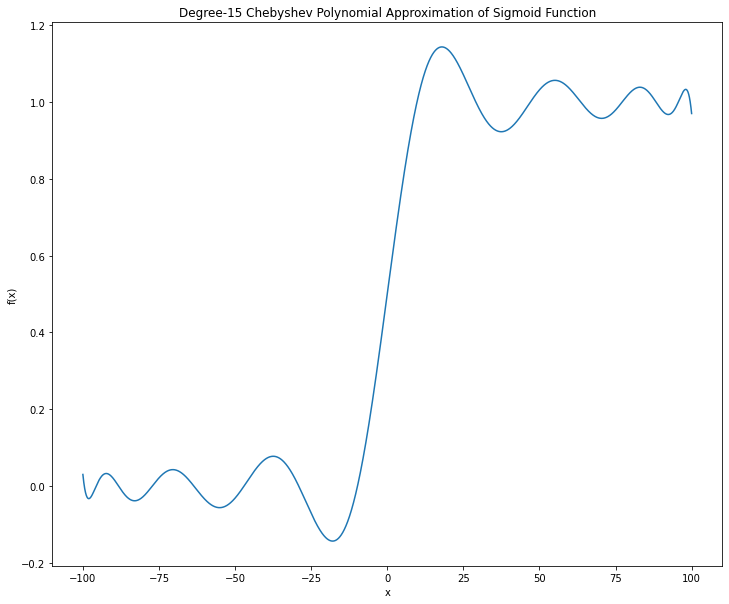

0.4939999999999998 + (0.18038515864766605)x^(1) + (1.0901501923399337e-17)x^(2) + (-0.004535640387668542)x^(3) + (-2.9592683858936655e-20)x^(4) + (5.4886866762235074e-05)x^(5) + (-1.5455589164048437e-21)x^(6) + (-3.377758932422119e-07)x^(7) + (1.5615951269865042e-23)x^(8) + (1.1410113968693596e-09)x^(9) + (-5.826652050018312e-26)x^(10) + (-2.1447985504561754e-12)x^(11) + (9.440422058105471e-29)x^(12) + (2.103964397492797e-15)x^(13) + (-5.566406250000002e-32)x^(14) + (-8.394879584813549e-19)x^(15) 


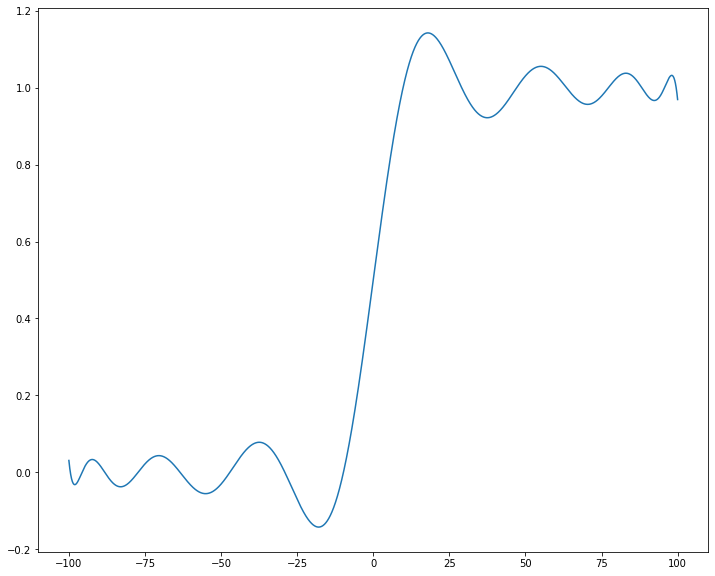

In [26]:
# Extract approximate function Chebyshev polynomial coefficients / save to disk

def sigmoid(x):
  return 1/(1 + np.exp(-x)) 

approx = np.polynomial.chebyshev.Chebyshev.interpolate(sigmoid, 15, [-100, 100])
coef = np.polynomial.chebyshev.cheb2poly(approx.coef)
for i in range(16):
  if i == 0:
    coef[i] = 0.76*(coef[i]+0.15)*(0.04**i)  
  else:
    coef[i] = 0.76*coef[i]*(0.04**i)
np.savetxt('coef.csv', coef, delimiter=',')
print(coef)
x, y = approx.linspace(1000000, [-100, 100])
plt.title("Degree-15 Chebyshev Polynomial Approximation of Sigmoid Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

poly = ""
for i in range(len(coef)):
  if i == 0:
    poly += str(coef[i]) + " "
  else:
    poly += "+ (" + str(coef[i]) + ")x" + "^(" + str(i) + ") "

print(poly)
x, y = approx.linspace(1000000, [-100, 100])
plt.plot(x, y)


In [0]:
# Helper functions

def plot_metrics(history):
  metrics =  ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

Define Approximate Function

In [0]:
def test2(x):
  return tf.constant(0.494, dtype=tf.float32) + tf.add_n([ 
                   0.180385159*tf.pow(x, 1), 
                   1.09015019*10**(-17)*tf.pow(x, 2), 
                   -4.53564039*10**(-3)*tf.pow(x, 3), 
                   0*-2.95926839*10**(-20)*tf.pow(x, 4), 
                   5.48868668*10**(-5)*tf.pow(x, 5), 
                   0*-1.54555892*10**(-21)*tf.pow(x, 6), 
                   -3.37775893*10**(-7)*tf.pow(x, 7), 
                   0*1.56159513*10**(-23)*tf.pow(x, 8), 
                   1.14101140*10**(-9)*tf.pow(x, 9), 
                   0*-5.82665205*10**(-26)*tf.pow(x, 10), 
                   -2.14479855*10**(-12)*tf.pow(x, 11), 
                   0*9.44042206*10**(-29)*tf.pow(x, 12), 
                   2.10396440*10**(-15)*tf.pow(x, 13), 
                   0*-5.56640625*10**(-32)*tf.pow(x, 14), 
                   -8.39487958*10**(-19)*tf.pow(x, 15)
  ])

Define Model

In [0]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          29, activation=test2,#tf_relu_approx,
          input_shape=(train_features.shape[-1],)),
      # keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation=test2,
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [0]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [31]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 29)                870       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 30        
Total params: 900
Trainable params: 900
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.predict(train_features[:10])

array([[0.59103805],
       [0.6011765 ],
       [0.56205237],
       [0.6415948 ],
       [0.6042614 ],
       [0.5893156 ],
       [0.5654691 ],
       [0.5765331 ],
       [0.5845136 ],
       [0.57825446]], dtype=float32)

In [33]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.8683


In [34]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [35]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.05193838],
       [0.05421618],
       [0.05409977],
       [0.05798021],
       [0.05960026],
       [0.05882826],
       [0.06566039],
       [0.07372758],
       [0.06150749],
       [0.06967989]], dtype=float32)

In [36]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0662


In [0]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

Oversample

In [0]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [39]:
print(pos_features.shape)
print(neg_features.shape)

ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(321, 29)
(181955, 29)


(181955, 29)

In [40]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(363910, 29)

In [0]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [42]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-0.36207636  0.36804004  0.76108664 -0.18822684 -0.40430173 -0.46427798
  0.55655684  0.05715643 -0.12048559 -0.94381367  1.         -0.41738381
 -1.         -1.          0.31886855  1.          0.26076495  1.
 -1.         -0.23718632  0.17551408  0.33007514 -0.14373765  0.67933269
 -0.41449976  0.73068084 -0.15387941  0.02716522  0.94628595]

Label:  1


In [0]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [44]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.5078125


In [45]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

278.0

In [0]:
val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

Train

In [47]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch = 20,
    epochs=10*EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 1s 64ms/step - loss: 0.6510 - tp: 19885.0000 - fp: 192326.0000 - tn: 191878.0000 - fn: 1423.0000 - accuracy: 0.5222 - precision: 0.0937 - recall: 0.9332 - auc: 0.6416 - val_loss: 0.6746 - val_tp: 65.0000 - val_fp: 15948.0000 - val_tn: 29553.0000 - val_fn: 3.0000 - val_accuracy: 0.6500 - val_precision: 0.0041 - val_recall: 0.9559 - val_auc: 0.9513
Epoch 2/1000
20/20 [==============================] - 0s 21ms/step - loss: 0.5907 - tp: 18138.0000 - fp: 3504.0000 - tn: 17090.0000 - fn: 2228.0000 - accuracy: 0.8601 - precision: 0.8381 - recall: 0.8906 - auc: 0.9323 - val_loss: 0.6074 - val_tp: 58.0000 - val_fp: 2716.0000 - val_tn: 42785.0000 - val_fn: 10.0000 - val_accuracy: 0.9402 - val_precision: 0.0209 - val_recall: 0.8529 - val_auc: 0.9474
Epoch 3/1000
20/20 [==============================] - 0s 22ms/step - loss: 0.5361 - tp: 17622.0000 - fp: 781.0000 - tn: 19659.0000 - fn: 2898.0000 - accuracy: 0.9102 - precision: 0.9576 - recall: 0

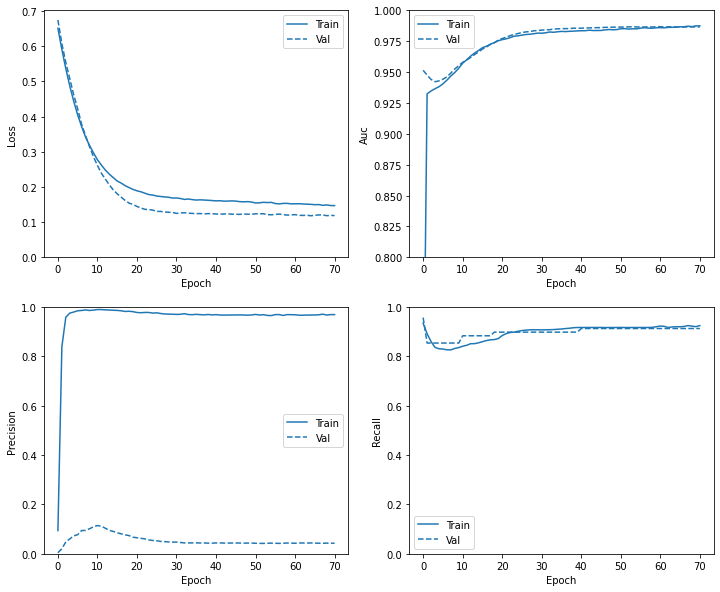

In [48]:
plot_metrics(resampled_history)

In [0]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.12061356753110886
tp :  93.0
fp :  1742.0
tn :  55117.0
fn :  10.0
accuracy :  0.9692426323890686
precision :  0.05068119987845421
recall :  0.9029126167297363
auc :  0.9784748554229736

Legitimate Transactions Detected (True Negatives):  55117
Legitimate Transactions Incorrectly Detected (False Positives):  1742
Fraudulent Transactions Missed (False Negatives):  10
Fraudulent Transactions Detected (True Positives):  93
Total Fraudulent Transactions:  103
[[-0.500355      0.052134015  -0.53797126   -0.13332993    0.13807689
   0.03938306    0.40938547    0.54872924    0.26085943    0.13983363
  -0.028105136   0.36844173   -0.0860734     0.39938962    0.22456956
   0.11929272    0.5582624     0.359121     -0.45654905   -0.32954034
   0.43139017   -0.020402692  -0.055294164  -0.38100886    0.43132618
   0.12053508    0.12282997    0.14465494   -0.12830819  ]
 [-0.291461      0.3143248     0.024856996  -0.3189144     0.33814082
   0.15954658    0.0016401135  0.36256126   -0.2478

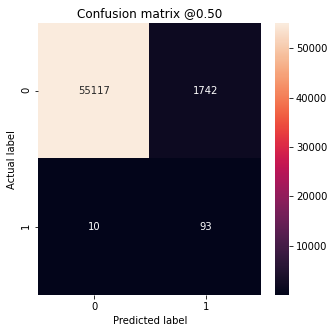

In [50]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

weights1 = resampled_model.layers[0].get_weights()[0]
biases1 = resampled_model.layers[0].get_weights()[1]
weights2 = resampled_model.layers[1].get_weights()[0]
biases2 = resampled_model.layers[1].get_weights()[1]

# with np.printoptions(precision=16, suppress=True):
#     print(weights1)

# print(weights1)
# print(biases1)
# print(weights2)
# print(biases2)

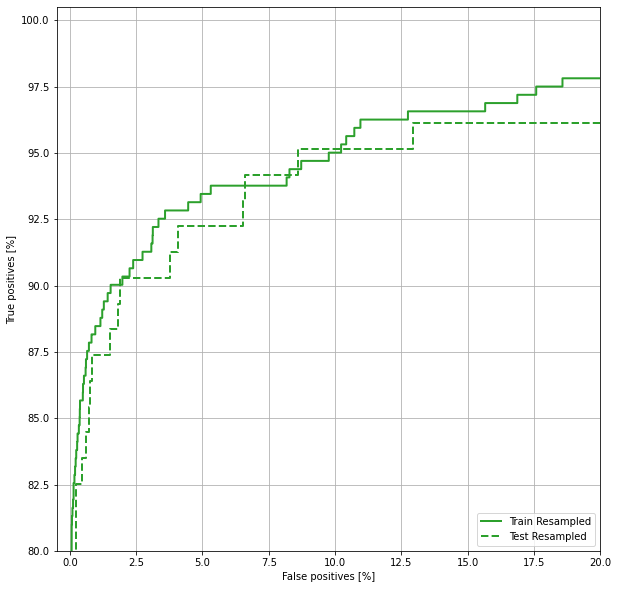

In [51]:
plot_roc("Train Resampled", train_labels, train_predictions_resampled,  color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled,  color=colors[2], linestyle='--')
plt.legend(loc='lower right')

Save Model and Weights/Biases to CSV

In [52]:
!pip install h5py

In [53]:
# serialize model to JSON
model_json = resampled_model.to_json()
with open("model2.json", "w") as json_file:
  json_file.write(model_json)
# serialize weights to HDF5
resampled_model.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


In [54]:
from keras.models import model_from_json

Using TensorFlow backend.


In [55]:
# load json and create model
json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
# loaded_model = model_from_json(loaded_model_json, custom_objects={'test2': test2})
loaded_model = make_model()
# load weights into new model
loaded_model.load_weights("model2.h5")
print("Loaded model from disk")

Loaded model from disk


loss :  0.12061356753110886
tp :  186.0
fp :  3484.0
tn :  110234.0
fn :  20.0
accuracy :  0.9692426323890686
precision :  0.05068119987845421
recall :  0.9029126167297363
auc :  0.9784748554229736

Legitimate Transactions Detected (True Negatives):  55117
Legitimate Transactions Incorrectly Detected (False Positives):  1742
Fraudulent Transactions Missed (False Negatives):  10
Fraudulent Transactions Detected (True Positives):  93
Total Fraudulent Transactions:  103


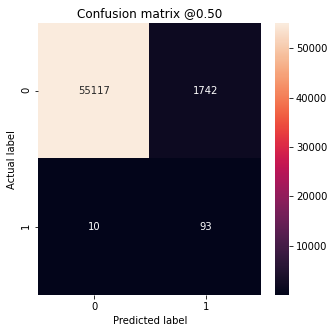

In [56]:
# Test load

train_predictions_resampled = loaded_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = loaded_model.predict(test_features, batch_size=BATCH_SIZE)

resampled_results = loaded_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(loaded_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

In [0]:
# Retrieve Weights

weights1 = loaded_model.layers[0].get_weights()[0]
biases1 = loaded_model.layers[0].get_weights()[1]
weights2 = loaded_model.layers[1].get_weights()[0]
biases2 = loaded_model.layers[1].get_weights()[1]

np.savetxt('weights1.csv', weights1, delimiter=',')
np.savetxt('biases1.csv', biases1, delimiter=',')
np.savetxt('weights2.csv', weights2, delimiter=',')
np.savetxt('biases2.csv', biases2, delimiter=',')